In [1]:
target_rd = 3000

import pandas as pd
df_cd4 = pd.read_csv('output_CD4.csv',index_col=0)
df_cd8 = pd.read_csv('output_CD8.csv',index_col=0)
df_cd8

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g
AAACCTGAGAAACGAG-1_PEM7C3,0.331257,0.123314,-0.095351,0.131056,0.254650,2.268480,0.171168
AAACCTGAGAAACGCC-1_PEM19C5,0.350721,0.133620,-0.000151,0.151304,0.330308,1.877538,0.071094
AAACCTGAGAATGTGT-1_PEM6C1,0.394767,0.110058,-0.013586,0.204549,0.396242,1.934647,0.228197
AAACCTGAGACGACGT-1_PEM6C1,0.392818,0.128556,-0.085507,0.236100,0.309933,1.799756,0.171126
AAACCTGAGACTAGGC-1_PEM19C1,0.444082,0.241061,0.041815,0.131813,0.413511,1.859909,0.093040
...,...,...,...,...,...,...,...
TTTGGTTTCTAACTTC-1_PEM15C1,0.575849,0.203845,0.072042,0.269931,0.511833,2.164280,0.266573
TTTGTCAAGGACATTA-1_PEM2C1,0.653011,0.322926,0.164971,0.403149,0.421185,1.808869,0.231454
TTTGTCAGTAGAAAGG-1_PEM8C3,0.505235,0.195173,0.007834,0.154523,0.431637,1.681031,0.161376
TTTGTCAGTCACACGC-1_PEM10C1,0.641723,0.204808,0.057912,0.281495,0.428499,2.209082,0.185643


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pos_sigs_CD8 = [
    "CD8_Lowery_pos_243g", 
    "CD8_Oliveira_TTE_100g", 
    "CD8_Oliveira_pos_74g", 
    "CD8_Yost_CD8_Exh_100g", 
    "CD8_ave_Hanada_pos_27g"
]
neg_sigs_CD8 = [
    "CD8_ave_Hanada_neg_5g", 
    "CD8_ave_Oliveira_virus_26g"
]

pos_sigs_CD4 = [
    "CD4_ave_Hanada_pos_9g", 
    "CD4_Caushi_Tfh2_66g", 
    "CD4_Lowery_pos_40g", 
    "CD4_Oh_CXCL13_50g"
]
neg_sigs_CD4 = [
    "CD4_Lowery_neg_37g", 
    "CD4_ave_Hanada_neg_4g"
]

def classify_cells(df, cell_type, pos_sigs, neg_sigs):
    sub = df.copy()
    cols = pos_sigs + neg_sigs

    # z‐score the signatures _within_ this subset
    z_pos = sub[pos_sigs].apply(zscore)
    z_neg = sub[neg_sigs].apply(zscore)

    # compute mean “pos” and “neg” scores
    sub[f"pos_score_{cell_type}"] = z_pos.mean(axis=1)
    sub[f"neg_score_{cell_type}"] = z_neg.mean(axis=1)

    # pick cutoffs (here: median)
    pos_cut = sub[f"pos_score_{cell_type}"].median()
    neg_cut = sub[f"neg_score_{cell_type}"].median()

    # classify per cell
    sub[f"cancer_reactive_per_cell_{cell_type}"] = (
        (sub[f"pos_score_{cell_type}"] >  pos_cut) &
        (sub[f"neg_score_{cell_type}"] <  neg_cut)
    )

    return sub, pos_cut, neg_cut

# run it for each cell‐type
cd8_called,pos_cut_CD8, neg_cut_CD8 = classify_cells(df_cd8, "CD8", pos_sigs_CD8, neg_sigs_CD8)
cd4_called,pos_cut_CD4, neg_cut_CD4 = classify_cells(df_cd4, "CD4", pos_sigs_CD4, neg_sigs_CD4)
cd8_called

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
AAACCTGAGAAACGAG-1_PEM7C3,0.331257,0.123314,-0.095351,0.131056,0.254650,2.268480,0.171168,-0.559540,0.506481,False
AAACCTGAGAAACGCC-1_PEM19C5,0.350721,0.133620,-0.000151,0.151304,0.330308,1.877538,0.071094,-0.096257,-0.817985,False
AAACCTGAGAATGTGT-1_PEM6C1,0.394767,0.110058,-0.013586,0.204549,0.396242,1.934647,0.228197,0.139634,0.391447,False
AAACCTGAGACGACGT-1_PEM6C1,0.392818,0.128556,-0.085507,0.236100,0.309933,1.799756,0.171126,-0.051039,-0.226277,False
AAACCTGAGACTAGGC-1_PEM19C1,0.444082,0.241061,0.041815,0.131813,0.413511,1.859909,0.093040,0.590177,-0.689054,True
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTAACTTC-1_PEM15C1,0.575849,0.203845,0.072042,0.269931,0.511833,2.164280,0.266573,1.323789,1.023918,False
TTTGTCAAGGACATTA-1_PEM2C1,0.653011,0.322926,0.164971,0.403149,0.421185,1.808869,0.231454,2.180222,0.218121,False
TTTGTCAGTAGAAAGG-1_PEM8C3,0.505235,0.195173,0.007834,0.154523,0.431637,1.681031,0.161376,0.596718,-0.481325,True
TTTGTCAGTCACACGC-1_PEM10C1,0.641723,0.204808,0.057912,0.281495,0.428499,2.209082,0.185643,1.311490,0.516870,False


In [3]:
df_combined = pd.concat([cd4_called, cd8_called],
                     axis=0,          # stack rows
                     ignore_index=False,
                     sort=False)
df_combined

,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
AAACCTGAGAATGTTG-1_PEM2C3,-0.065832,0.518551,0.058804,-0.082044,0.436319,2.228253,-0.178627,0.403400,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGACCCACC-1_PEM16C1,-0.092007,0.531257,0.031425,-0.082496,0.639571,1.946308,0.038698,-0.056682,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGACCCACC-1_PEM2C3,-0.006581,0.522843,0.220745,-0.076385,0.875706,2.249676,1.489424,0.461855,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGACGACGT-1_PEM14C1,-0.110736,0.365503,0.026857,-0.080234,0.682802,1.996783,0.048976,-0.704961,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGACTGTAA-1_PEM13C5,-0.135592,0.433632,0.040463,-0.103595,0.465012,2.223325,-0.536847,0.014835,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTAACTTC-1_PEM15C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.575849,0.203845,0.072042,0.269931,0.511833,2.164280,0.266573,1.323789,1.023918,False
TTTGTCAAGGACATTA-1_PEM2C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.653011,0.322926,0.164971,0.403149,0.421185,1.808869,0.231454,2.180222,0.218121,False
TTTGTCAGTAGAAAGG-1_PEM8C3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.505235,0.195173,0.007834,0.154523,0.431637,1.681031,0.161376,0.596718,-0.481325,True
TTTGTCAGTCACACGC-1_PEM10C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.641723,0.204808,0.057912,0.281495,0.428499,2.209082,0.185643,1.311490,0.516870,False


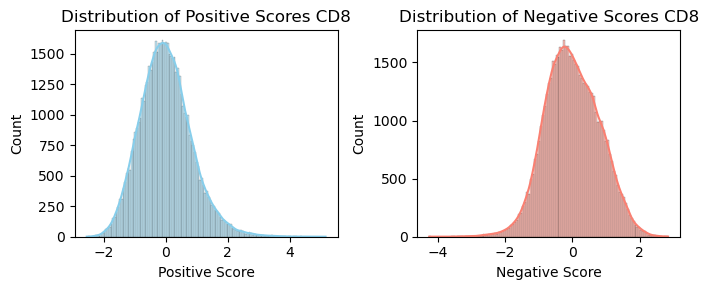

In [4]:
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
sns.histplot(cd8_called['pos_score_CD8'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD8')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd8_called['neg_score_CD8'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD8')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

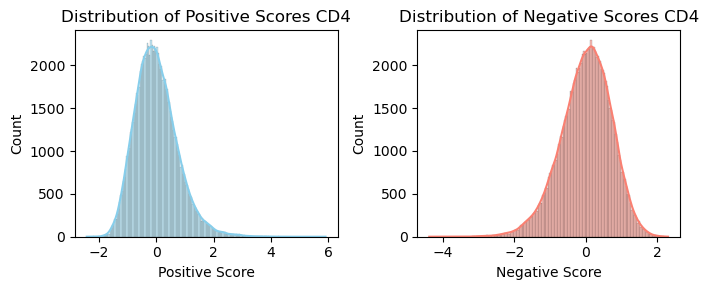

In [5]:
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
sns.histplot(cd4_called['pos_score_CD4'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD4')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd4_called['neg_score_CD4'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD4')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

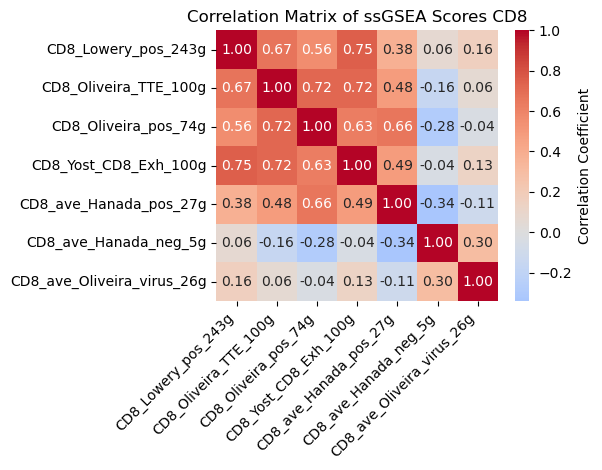

In [6]:
# Combine the lists to get all columns
all_sigs_CD8 = pos_sigs_CD8 + neg_sigs_CD8

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd8_called[all_sigs_CD8].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4.8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD8")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

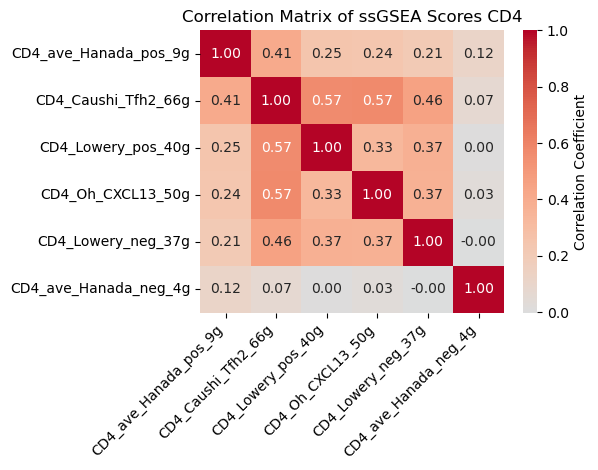

In [7]:
# Combine the lists to get all columns
all_sigs_CD4 = pos_sigs_CD4 + neg_sigs_CD4

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd4_called[all_sigs_CD4].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4.8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD4")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Clustering based on signature genes

In [8]:
import pickle
with open("signatures_CD8.pkl", "rb") as f:
    sigs_CD8 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD8.items()})

with open("signatures_CD4.pkl", "rb") as f:
    sigs_CD4 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD4.items()})

del sigs_CD4['Jansen_TermDiff_73g']
del sigs_CD8['Lowery_neg_99g']

{'Lowery_pos_243g': 243, 'Oliveira_TTE_100g': 100, 'Oliveira_pos_74g': 74, 'Yost_CD8_Exh_100g': 100, 'Hanada_pos_27g': 27, 'Lowery_neg_99g': 99, 'Oliveira_virus_26g': 26, 'Hanada_neg_5g': 5}
{'Lowery_pos_40g': 40, 'Jansen_TermDiff_73g': 73, 'Caushi_Tfh2_66g': 66, 'Oh_CXCL13_50g': 50, 'Hanada_pos_9g': 9, 'Lowery_neg_37g': 37, 'Hanada_neg_4g': 4}


In [9]:
import scanpy as sc
adata = sc.read_h5ad("GSE212217_all_samples_with_metadata.h5ad")
print(adata.obs["finalIdent"].value_counts())

t_cell = {"CD4":[
 'CD4 Activated', 'CD4 Naive', 'Treg'], 'CD8':['CD8 Activated',
 'CD8 Naive', 'CD8 Exhausted'
]}
sc.pp.calculate_qc_metrics(adata, inplace=True)
adata_CD8 = adata[adata.obs["finalIdent"].isin(t_cell['CD8'])]
adata_CD4 = adata[adata.obs["finalIdent"].isin(t_cell['CD4'])]

finalIdent
CD4 Activated               47954
CD8 Activated               47559
CD4 Naive                   37479
CD16 NK                     29046
CD14 Monocytes              28296
CD16 Monocytes              10801
Activated B Cells            9736
CD8 Naive                    8927
Intermediate Monocytes       8065
Treg                         7654
GDT                          4971
cDC                          4017
CD56 NK                      3209
Memory B Cells               3152
MAIT                         2945
Cycling                      2051
pDC                          1353
CD8 Exhausted                1060
Plasma Cells                 1014
Hematopoetic Progenitors      319
Naive B Cells                 226
Name: count, dtype: int64


In [10]:
target_rd

3000

In [11]:
sc.pp.normalize_total(adata_CD8, target_sum=target_rd)
sc.pp.log1p(adata_CD8)  # log transform

sc.pp.normalize_total(adata_CD4, target_sum=target_rd)
sc.pp.log1p(adata_CD4) 

/Users/wsun/anaconda3/envs/CAT/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [12]:
all_genes_flat_CD8 = [item for sublist in sigs_CD8.values() for item in sublist]
all_genes_flat_CD4 = [item for sublist in sigs_CD4.values() for item in sublist]
subset_genes_CD8 = list(set(all_genes_flat_CD8))
subset_genes_CD4 = list(set(all_genes_flat_CD4))

In [13]:
matched_genes_CD8 = []
matched_genes_CD4 = []

for s1 in subset_genes_CD8:
    if s1 in list(adata_CD8.var.index):
        matched_genes_CD8.append(s1)
for s1 in subset_genes_CD4:
    if s1 in list(adata_CD4.var.index):
        matched_genes_CD4.append(s1)    
# Print match info
print(f" {len(matched_genes_CD4)}/{len(subset_genes_CD4)} CD4 genes are found.")
print(f" {len(matched_genes_CD8)}/{len(subset_genes_CD8)} CD8 genes are found.")

 162/164 CD4 genes are found.
 394/396 CD8 genes are found.


/Users/wsun/anaconda3/envs/CAT/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_78249/3574297429.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(sub_adata, resolution=0.5)


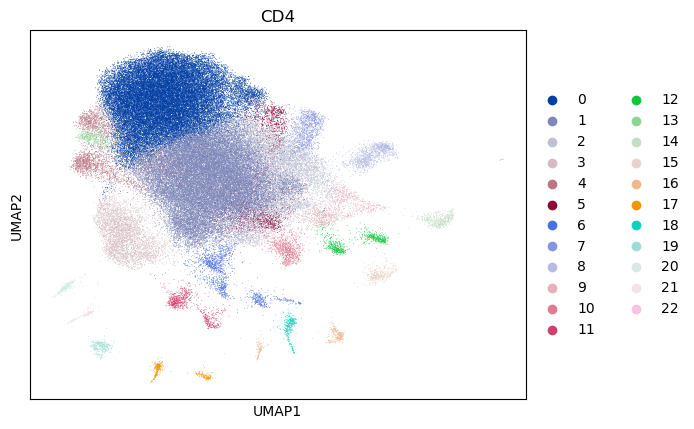

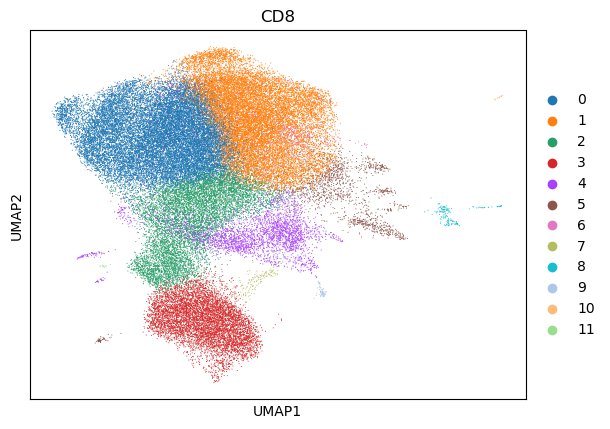

In [14]:
%matplotlib inline
def run_cluster(sub_adata, key: str):
    sc.pp.scale(sub_adata)
    sc.tl.pca(sub_adata, svd_solver="arpack")
    sc.pp.neighbors(sub_adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(sub_adata)
    sc.tl.leiden(sub_adata, resolution=0.5)
    sc.pl.umap(sub_adata, color="leiden", title=key)
    return sub_adata.obs["leiden"].rename(f"cluster_{key}")

leiden_cd4 = run_cluster(adata_CD4[:, matched_genes_CD4].copy(), "CD4")
leiden_cd8 = run_cluster(adata_CD8[:, matched_genes_CD8].copy(), "CD8")

clusters_wide = pd.concat([leiden_cd4, leiden_cd8], axis=1)


In [15]:
merged_df = df_combined.join(clusters_wide[['cluster_CD4','cluster_CD8']])

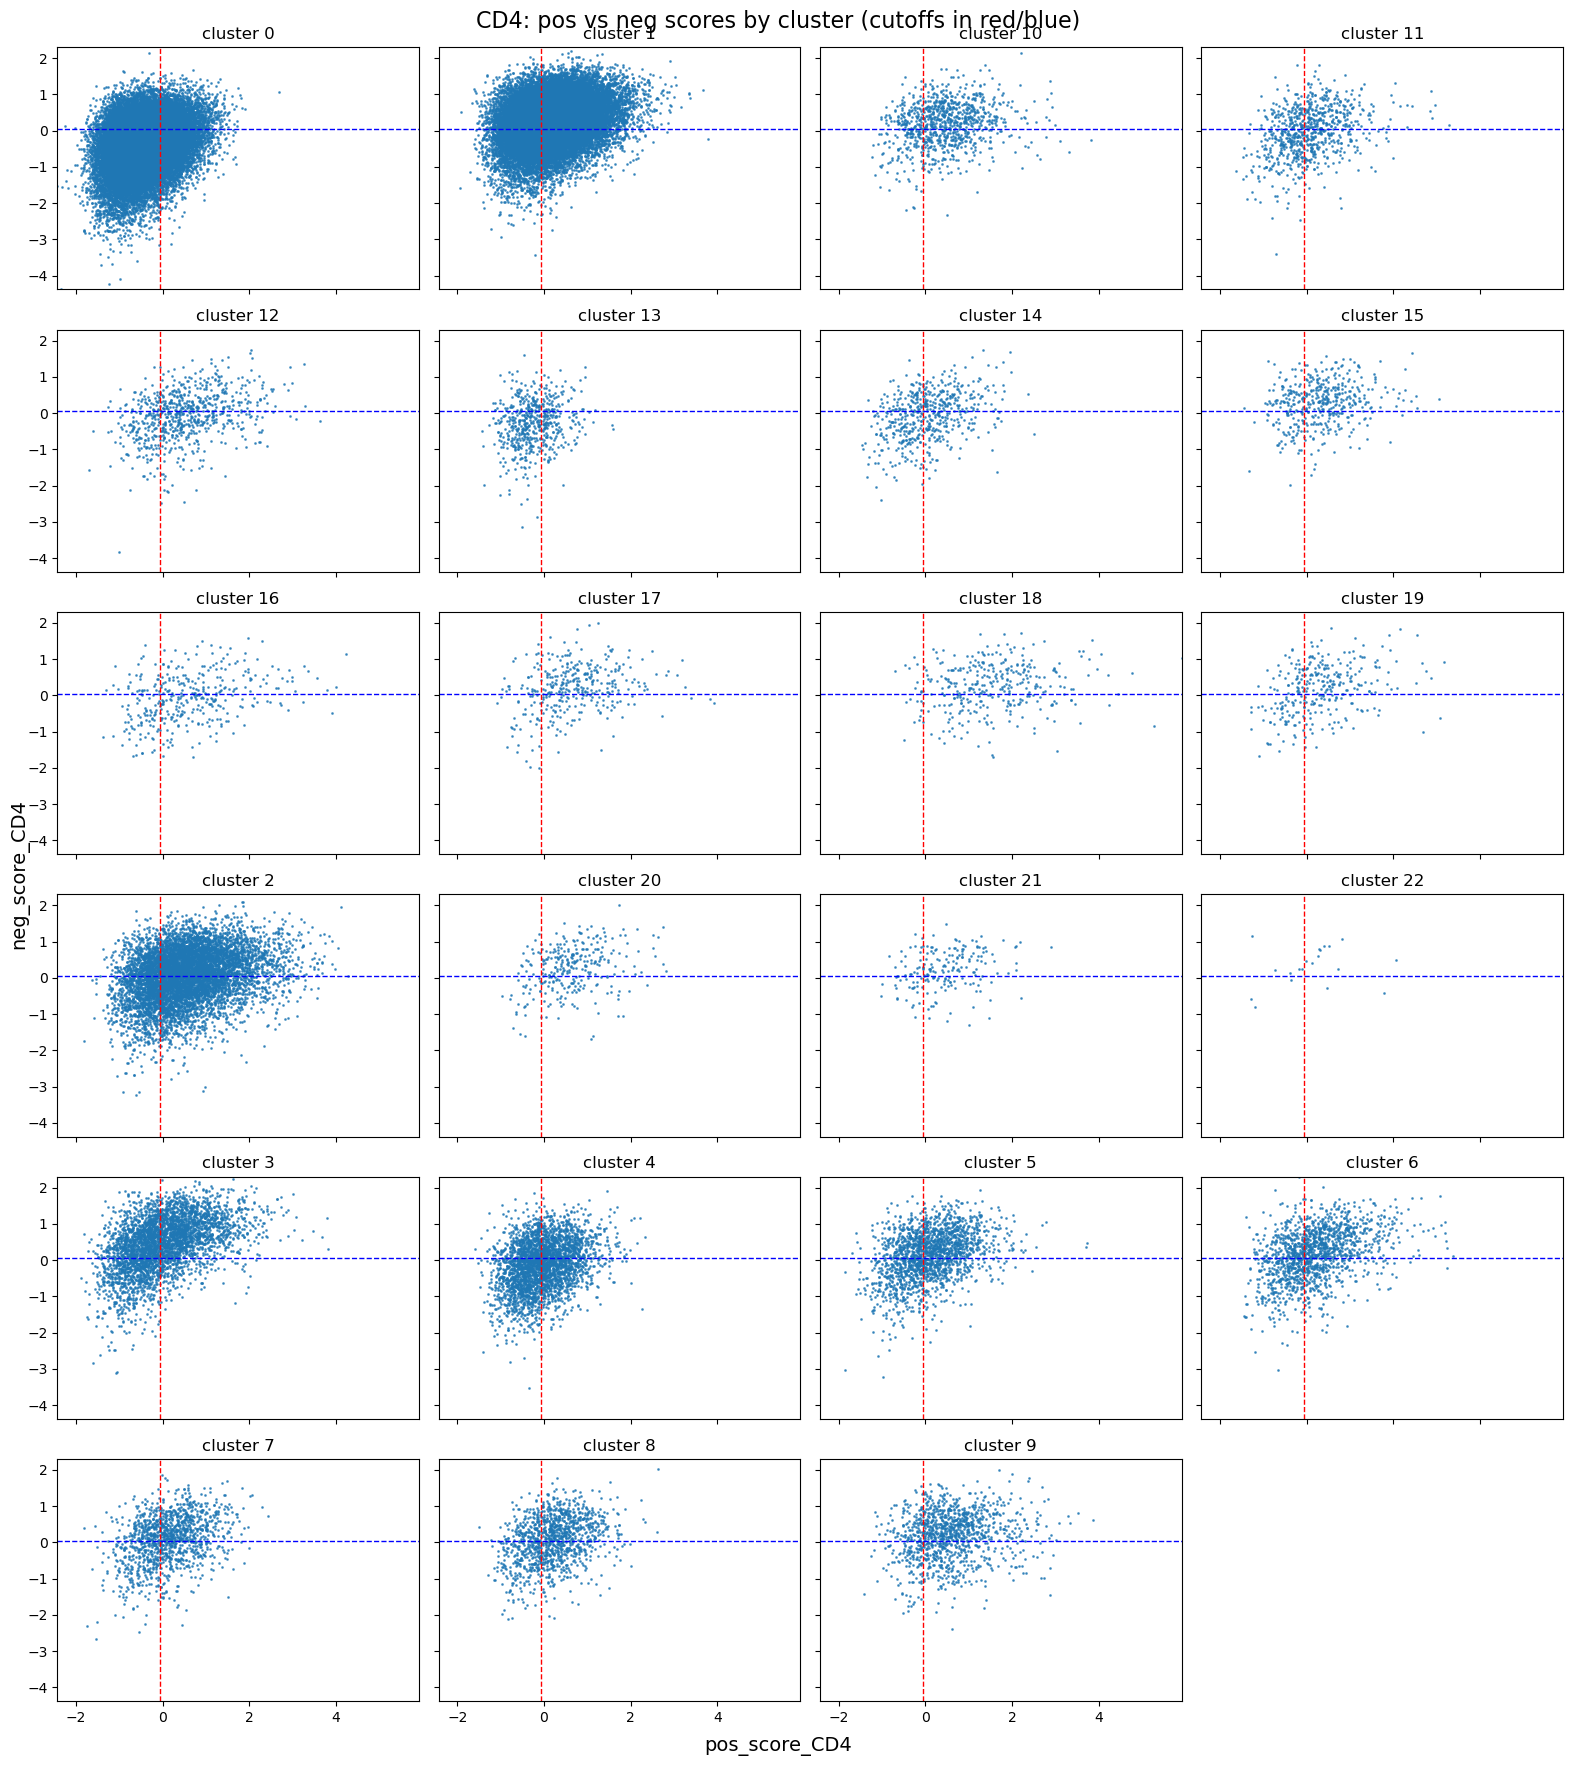

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

clusters = [c for c in merged_df['cluster_CD4'].unique() if pd.notna(c)]
clusters = sorted(clusters)

# global axis limits
xmin, xmax = merged_df['pos_score_CD4'].min(), merged_df['pos_score_CD4'].max()
ymin, ymax = merged_df['neg_score_CD4'].min(), merged_df['neg_score_CD4'].max()

# layout
n = len(clusters)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(4*ncols, 3*nrows),
    sharex=True, sharey=True
)

for ax, clu in zip(axes.flat, clusters):
    sub = merged_df[merged_df['cluster_CD4'] == clu]
    
    # scatter
    ax.scatter(
        sub['pos_score_CD4'],
        sub['neg_score_CD4'],
        s=1,
        alpha=0.7
    )
    

    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# turn off any unused subplots
for ax in axes.flat[n:]:
    ax.axis('off')

# global labels & title
fig.supxlabel('pos_score_CD4', fontsize=14)
fig.supylabel('neg_score_CD4', fontsize=14)
fig.suptitle('CD4: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

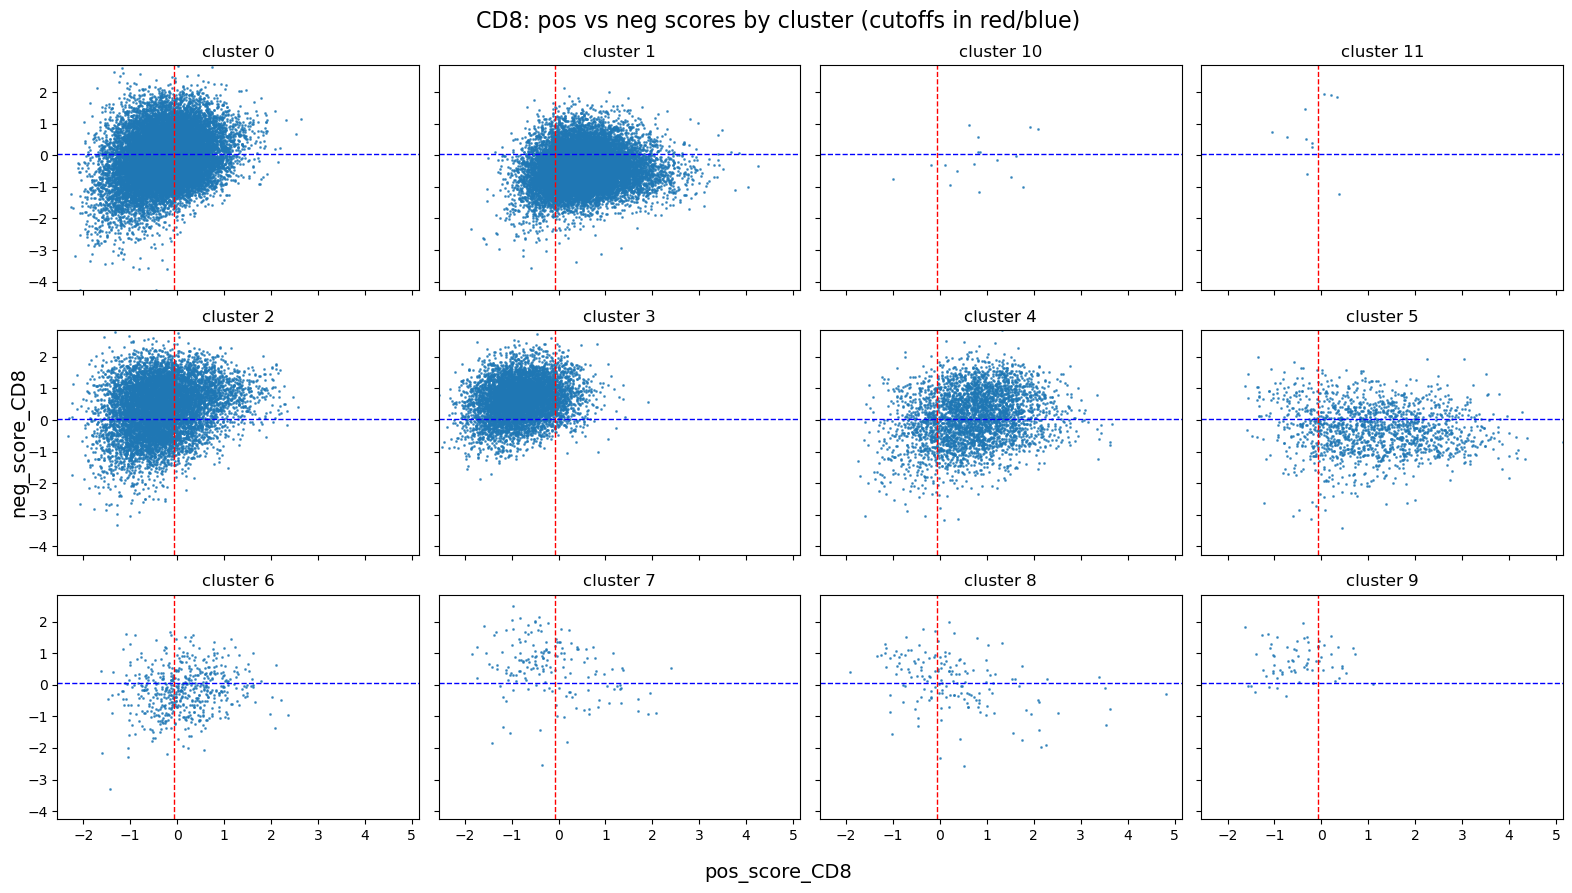

In [17]:
clusters_cd8 = [c for c in merged_df['cluster_CD8'].unique() if pd.notna(c)]
clusters_cd8 = sorted(clusters_cd8)

# compute global axis limits for CD8
xmin8, xmax8 = merged_df['pos_score_CD8'].min(), merged_df['pos_score_CD8'].max()
ymin8, ymax8 = merged_df['neg_score_CD8'].min(), merged_df['neg_score_CD8'].max()

# layout: 4 columns, as many rows as needed
n8 = len(clusters_cd8)
ncols8 = 4
nrows8 = int(np.ceil(n8 / ncols8))

fig8, axes8 = plt.subplots(
    nrows8, ncols8,
    figsize=(4*ncols8, 3*nrows8),
    sharex=True, sharey=True
)

for ax, clu in zip(axes8.flat, clusters_cd8):
    sub8 = merged_df[merged_df['cluster_CD8'] == clu]
    
    # scatter
    ax.scatter(
        sub8['pos_score_CD8'],
        sub8['neg_score_CD8'],
        s=1,
        alpha=0.7
    )
        
    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin8, xmax8)
    ax.set_ylim(ymin8, ymax8)

# disable unused subplots
for ax in axes8.flat[n8:]:
    ax.axis('off')

# global labels & title
fig8.supxlabel('pos_score_CD8', fontsize=14)
fig8.supylabel('neg_score_CD8', fontsize=14)
fig8.suptitle('CD8: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

In [18]:
merged_df["cell_type_by_cluster"] = merged_df["cluster_CD4"].notna().map({True: "CD4", False: "CD8"})

In [19]:
merged_df["cluster"] = merged_df.apply(
    lambda r: r["cluster_CD4"] if r["cell_type_by_cluster"] == "CD4"
              else r["cluster_CD8"],
    axis=1
)

merged_df["cancer_reactive_per_cell"] = merged_df.apply(
    lambda r: r["cancer_reactive_per_cell_CD4"] if r["cell_type_by_cluster"] == "CD4"
              else r["cancer_reactive_per_cell_CD8"],
    axis=1
)

# Group by both cell_type & cluster and compute the fraction reactive
cluster_frac = (
    merged_df
    .groupby(["cell_type_by_cluster", "cluster"])["cancer_reactive_per_cell"]
    .mean()
    .rename("reactive_fraction")
)

cluster_frac_df = cluster_frac.reset_index()
cluster_frac_df

,cell_type_by_cluster,cluster,reactive_fraction
0,CD4,0,0.153206
1,CD4,1,0.161587
2,CD4,10,0.253461
3,CD4,11,0.215809
4,CD4,12,0.370224
5,CD4,13,0.229422
6,CD4,14,0.228519
7,CD4,15,0.186517
8,CD4,16,0.370667
9,CD4,17,0.244444


In [20]:
#  threshold and collect all (cell_type, cluster) pairs above it
threshold = 0.4
reactive_pairs = set(
    cluster_frac[cluster_frac > threshold].index
)

reactive_pairs


{('CD8', '1'), ('CD8', '10'), ('CD8', '5')}

In [21]:
# map back to every cell
merged_df["cancer_reactive_by_cluster"] = merged_df.apply(
    lambda r: True
              if (r["cell_type_by_cluster"], r["cluster"]) in reactive_pairs
              else False,
    axis=1
)
merged_df

,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,CD8_Lowery_pos_243g,...,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD4,cluster_CD8,cell_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster
AAACCTGAGAATGTTG-1_PEM2C3,-0.065832,0.518551,0.058804,-0.082044,0.436319,2.228253,-0.178627,0.403400,False,NaN,...,NaN,NaN,NaN,NaN,0,NaN,CD4,0,False,False
AAACCTGAGACCCACC-1_PEM16C1,-0.092007,0.531257,0.031425,-0.082496,0.639571,1.946308,0.038698,-0.056682,True,NaN,...,NaN,NaN,NaN,NaN,1,NaN,CD4,1,True,False
AAACCTGAGACCCACC-1_PEM2C3,-0.006581,0.522843,0.220745,-0.076385,0.875706,2.249676,1.489424,0.461855,False,NaN,...,NaN,NaN,NaN,NaN,2,NaN,CD4,2,False,False
AAACCTGAGACGACGT-1_PEM14C1,-0.110736,0.365503,0.026857,-0.080234,0.682802,1.996783,0.048976,-0.704961,True,NaN,...,NaN,NaN,NaN,NaN,1,NaN,CD4,1,True,False
AAACCTGAGACTGTAA-1_PEM13C5,-0.135592,0.433632,0.040463,-0.103595,0.465012,2.223325,-0.536847,0.014835,False,NaN,...,NaN,NaN,NaN,NaN,1,NaN,CD4,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTAACTTC-1_PEM15C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.575849,...,0.266573,1.323789,1.023918,False,NaN,2,CD8,2,False,False
TTTGTCAAGGACATTA-1_PEM2C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.653011,...,0.231454,2.180222,0.218121,False,NaN,1,CD8,1,False,True
TTTGTCAGTAGAAAGG-1_PEM8C3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.505235,...,0.161376,0.596718,-0.481325,True,NaN,1,CD8,1,True,True
TTTGTCAGTCACACGC-1_PEM10C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.641723,...,0.185643,1.311490,0.516870,False,NaN,2,CD8,2,False,False


# Join with TCR data

In [22]:
vdj = pd.read_csv("vdj.csv",index_col=0)
vdj

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id,sample,orig.ident
cell_id,,,,,,,,,,,,,,,,,,,,
AAACCTGAGGATGGAA-1_PEM3C3,AAACCTGAGGATGGAA-1,True,AAACCTGAGGATGGAA-1_contig_1,True,703,TRB,TRBV7-9,TRBD1,TRBJ1-4,TRBC1,True,True,CASSLGTGANEKLFF,TGTGCCAGCAGCTTGGGGACAGGCGCCAATGAAAAACTGTTTTTT,122394,27,clonotype40,clonotype40_consensus_2,GSM6514154,PEM3C3
AAACCTGAGGATGGAA-1_PEM3C3,AAACCTGAGGATGGAA-1,True,AAACCTGAGGATGGAA-1_contig_2,True,517,TRA,TRAV13-1,NaN,TRAJ48,TRAC,True,True,CAARIGNEKLTF,TGTGCAGCAAGGATTGGAAATGAGAAATTAACCTTT,34504,7,clonotype40,clonotype40_consensus_1,GSM6514154,PEM3C3
AAACCTGTCGAATGGG-1_PEM3C3,AAACCTGTCGAATGGG-1,True,AAACCTGTCGAATGGG-1_contig_1,True,723,TRA,TRAV5,NaN,TRAJ42,TRAC,True,True,CAESENYGGSQGNLIF,TGTGCAGAGAGTGAAAATTATGGAGGAAGCCAAGGAAATCTCATCTTT,16219,3,clonotype86,clonotype86_consensus_2,GSM6514154,PEM3C3
AAACCTGTCGAATGGG-1_PEM3C3,AAACCTGTCGAATGGG-1,True,AAACCTGTCGAATGGG-1_contig_2,True,952,Multi,NaN,NaN,TRAJ5,TRAC,False,NaN,NaN,NaN,3252,1,clonotype86,NaN,GSM6514154,PEM3C3
AAACCTGTCGAATGGG-1_PEM3C3,AAACCTGTCGAATGGG-1,True,AAACCTGTCGAATGGG-1_contig_5,True,866,TRB,TRBV24-1,TRBD2,TRBJ2-1,TRBC2,True,True,CATSDFGMNNEQFF,TGTGCCACCAGTGATTTCGGGATGAACAATGAGCAGTTCTTC,62097,15,clonotype86,clonotype86_consensus_1,GSM6514154,PEM3C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGAGCGAT-1_PEM13C1,TTTGTCAGTGAGCGAT-1,True,TTTGTCAGTGAGCGAT-1_contig_2,True,460,TRB,TRBV28,NaN,TRBJ1-1,TRBC1,True,True,CASIRTTEAFF,TGTGCCAGTATCCGGACCACTGAAGCTTTCTTT,8263,4,clonotype2169,clonotype2169_consensus_1,GSM6514180,PEM13C1
TTTGTCAGTGAGCGAT-1_PEM13C1,TTTGTCAGTGAGCGAT-1,True,TTTGTCAGTGAGCGAT-1_contig_3,True,310,TRB,NaN,NaN,TRBJ2-5,TRBC2,False,False,NaN,NaN,4302,1,clonotype2169,NaN,GSM6514180,PEM13C1
TTTGTCATCTCACATT-1_PEM13C1,TTTGTCATCTCACATT-1,True,TTTGTCATCTCACATT-1_contig_1,True,465,TRA,TRAV13-1,NaN,TRAJ53,TRAC,True,True,CAASGGGGSNYKLTF,TGTGCAGCAAGTGGGGGTGGAGGTAGCAACTATAAACTGACATTT,3136,2,clonotype2170,clonotype2170_consensus_2,GSM6514180,PEM13C1


In [23]:
vdj['TCR_entry_number'] = vdj.groupby(vdj.index).cumcount()
vdj = vdj[vdj["chain"].isin(["TRA", "TRB"])]
vdj

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id,sample,orig.ident,TCR_entry_number
cell_id,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGGATGGAA-1_PEM3C3,AAACCTGAGGATGGAA-1,True,AAACCTGAGGATGGAA-1_contig_1,True,703,TRB,TRBV7-9,TRBD1,TRBJ1-4,TRBC1,...,True,CASSLGTGANEKLFF,TGTGCCAGCAGCTTGGGGACAGGCGCCAATGAAAAACTGTTTTTT,122394,27,clonotype40,clonotype40_consensus_2,GSM6514154,PEM3C3,0
AAACCTGAGGATGGAA-1_PEM3C3,AAACCTGAGGATGGAA-1,True,AAACCTGAGGATGGAA-1_contig_2,True,517,TRA,TRAV13-1,NaN,TRAJ48,TRAC,...,True,CAARIGNEKLTF,TGTGCAGCAAGGATTGGAAATGAGAAATTAACCTTT,34504,7,clonotype40,clonotype40_consensus_1,GSM6514154,PEM3C3,1
AAACCTGTCGAATGGG-1_PEM3C3,AAACCTGTCGAATGGG-1,True,AAACCTGTCGAATGGG-1_contig_1,True,723,TRA,TRAV5,NaN,TRAJ42,TRAC,...,True,CAESENYGGSQGNLIF,TGTGCAGAGAGTGAAAATTATGGAGGAAGCCAAGGAAATCTCATCTTT,16219,3,clonotype86,clonotype86_consensus_2,GSM6514154,PEM3C3,0
AAACCTGTCGAATGGG-1_PEM3C3,AAACCTGTCGAATGGG-1,True,AAACCTGTCGAATGGG-1_contig_5,True,866,TRB,TRBV24-1,TRBD2,TRBJ2-1,TRBC2,...,True,CATSDFGMNNEQFF,TGTGCCACCAGTGATTTCGGGATGAACAATGAGCAGTTCTTC,62097,15,clonotype86,clonotype86_consensus_1,GSM6514154,PEM3C3,2
AAACCTGTCGGTCTAA-1_PEM3C3,AAACCTGTCGGTCTAA-1,True,AAACCTGTCGGTCTAA-1_contig_1,True,826,TRB,TRBV19,TRBD1,TRBJ1-5,TRBC1,...,True,CASSITGDGQPQHF,TGTGCCAGTAGTATAACCGGGGATGGTCAGCCCCAGCATTTT,27495,8,clonotype87,clonotype87_consensus_1,GSM6514154,PEM3C3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGAGCGAT-1_PEM13C1,TTTGTCAGTGAGCGAT-1,True,TTTGTCAGTGAGCGAT-1_contig_2,True,460,TRB,TRBV28,NaN,TRBJ1-1,TRBC1,...,True,CASIRTTEAFF,TGTGCCAGTATCCGGACCACTGAAGCTTTCTTT,8263,4,clonotype2169,clonotype2169_consensus_1,GSM6514180,PEM13C1,1
TTTGTCAGTGAGCGAT-1_PEM13C1,TTTGTCAGTGAGCGAT-1,True,TTTGTCAGTGAGCGAT-1_contig_3,True,310,TRB,NaN,NaN,TRBJ2-5,TRBC2,...,False,NaN,NaN,4302,1,clonotype2169,NaN,GSM6514180,PEM13C1,2
TTTGTCATCTCACATT-1_PEM13C1,TTTGTCATCTCACATT-1,True,TTTGTCATCTCACATT-1_contig_1,True,465,TRA,TRAV13-1,NaN,TRAJ53,TRAC,...,True,CAASGGGGSNYKLTF,TGTGCAGCAAGTGGGGGTGGAGGTAGCAACTATAAACTGACATTT,3136,2,clonotype2170,clonotype2170_consensus_2,GSM6514180,PEM13C1,0


In [24]:
df_final = (
    merged_df
    .join(vdj)   # left‐join by index & column
)

# Set multi-index with barcode and TCR_entry_number
df_final = df_final.set_index('TCR_entry_number', append=True)
print(merged_df.shape)
print(df_final.shape)
df_final

(150622, 25)
(332962, 45)


CD4_Caushi_Tfh2_66g  \
                           TCR_entry_number                        
AAACCTGAGAATGTTG-1_PEM2C3  0.0                         -0.065832   
AAACCTGAGACCCACC-1_PEM16C1 0.0                         -0.092007   
                           1.0                         -0.092007   
AAACCTGAGACCCACC-1_PEM2C3  0.0                         -0.006581   
                           1.0                         -0.006581   
...                                                          ...   
TTTGTCAGTTAGAACA-1_PEM14C5 1.0                               NaN   
                           2.0                               NaN   
                           3.0                               NaN   
                           4.0                               NaN   
                           5.0                               NaN   

                                             CD4_Lowery_neg_37g  \
                           TCR_entry_number                       
AAACCTGAGAATGTTG-1_PEM2C3  0.0                         0.518551   
AAACCTGAGACCCACC-1_PEM16C1 0.0                         0.531257   
                           1.0                         0.531257   
AAACCTGAGACCCACC-1_PEM2C3  0.0                         0.522843   
                           1.0                         0.522843   
...                                                         ...   
TTTGTCAGTTAGAACA-1_PEM14C5 1.0                              NaN   
                           2.0                              NaN   
                           3.0                              NaN   
                           4.0                              NaN   
                           5.0                              NaN   

                                             CD4_Lowery_pos_40g  \
                           TCR_entry_number                       
AAACCTGAGAATGTTG-1_PEM2C3  0.0                         0.058804   
AAACCTGAGACCCACC-1_PEM16C1 0.0                         0.031425   
                           1.0                         0.031425   
AAACCTGAGACCCACC-1_PEM2C3  0.0                         0.220745   
                           1.0                         0.220745   
...                                                         ...   
TTTGTCAGTTAGAACA-1_PEM14C5 1.0                              NaN   
                           2.0                              NaN   
                           3.0                              NaN   
                           4.0                              NaN   
                           5.0                              NaN   

                                             CD4_Oh_CXCL13_50g  \
                           TCR_entry_number                      
AAACCTGAGAATGTTG-1_PEM2C3  0.0                       -0.082044   
AAACCTGAGACCCACC-1_PEM16C1 0.0                       -0.082496   
                           1.0                       -0.082496   
AAACCTGAGACCCACC-1_PEM2C3  0.0                       -0.076385   
                           1.0                       -0.076385   
...                                                        ...   
TTTGTCAGTTAGAACA-1_PEM14C5 1.0                             NaN   
                           2.0                             NaN   
                           3.0                             NaN   
                           4.0                             NaN   
                           5.0                             NaN   

                                             CD4_ave_Hanada_pos_9g  \
                           TCR_entry_number                          
AAACCTGAGAATGTTG-1_PEM2C3  0.0                            0.436319   
AAACCTGAGACCCACC-1_PEM16C1 0.0                            0.639571   
                           1.0                            0.639571   
AAACCTGAGACCCACC-1_PEM2C3  0.0                            0.875706   
                           1.0                            0.875706   
...                                                            ... 

In [25]:
out_CD4 = df_final[df_final["cell_type_by_cluster"]=='CD4']
out_CD8 = df_final[df_final["cell_type_by_cluster"]=='CD8']
out_CD8 = out_CD8.dropna(axis=1, how='all')
out_CD4 = out_CD4.dropna(axis=1, how='all')
pd.set_option('display.max_columns', None)
out_CD8

CD8_Lowery_pos_243g  \
                           TCR_entry_number                        
AAACCTGAGAAACGAG-1_PEM7C3  0.0                          0.331257   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                          0.350721   
                           1.0                          0.350721   
AAACCTGAGAATGTGT-1_PEM6C1  0.0                          0.394767   
                           2.0                          0.394767   
...                                                          ...   
TTTGTCAGTTAGAACA-1_PEM14C5 1.0                          0.838735   
                           2.0                          0.838735   
                           3.0                          0.838735   
                           4.0                          0.838735   
                           5.0                          0.838735   

                                             CD8_Oliveira_TTE_100g  \
                           TCR_entry_number                          
AAACCTGAGAAACGAG-1_PEM7C3  0.0                            0.123314   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                            0.133620   
                           1.0                            0.133620   
AAACCTGAGAATGTGT-1_PEM6C1  0.0                            0.110058   
                           2.0                            0.110058   
...                                                            ...   
TTTGTCAGTTAGAACA-1_PEM14C5 1.0                            0.376840   
                           2.0                            0.376840   
                           3.0                            0.376840   
                           4.0                            0.376840   
                           5.0                            0.376840   

                                             CD8_Oliveira_pos_74g  \
                           TCR_entry_number                         
AAACCTGAGAAACGAG-1_PEM7C3  0.0                          -0.095351   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                          -0.000151   
                           1.0                          -0.000151   
AAACCTGAGAATGTGT-1_PEM6C1  0.0                          -0.013586   
                           2.0                          -0.013586   
...                                                           ...   
TTTGTCAGTTAGAACA-1_PEM14C5 1.0                           0.283708   
                           2.0                           0.283708   
                           3.0                           0.283708   
                           4.0                           0.283708   
                           5.0                           0.283708   

                                             CD8_Yost_CD8_Exh_100g  \
                           TCR_entry_number                          
AAACCTGAGAAACGAG-1_PEM7C3  0.0                            0.131056   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                            0.151304   
                           1.0                            0.151304   
AAACCTGAGAATGTGT-1_PEM6C1  0.0                            0.204549   
                           2.0                            0.204549   
...                                                            ...   
TTTGTCAGTTAGAACA-1_PEM14C5 1.0                            0.480316   
                           2.0                            0.480316   
                           3.0                            0.480316   
                           4.0                            0.480316   
                           5.0                            0.480316   

                                             CD8_ave_Hanada_pos_27g  \
                           TCR_entry_number                           
AAACCTGAGAAACGAG-1_PEM7C3  0.0                             0.254650   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                             0.330308   
                           1.0                             0.330308   
AAACCTGAGAATGTGT-1_PEM6C1  0.0                             0.396242   
              

In [26]:
out_CD8.to_csv("cell_meta_data_CD8.csv", index=True)
out_CD4.to_csv("cell_meta_data_CD4.csv", index=True)

In [27]:
out_CD8 = pd.read_csv('cell_meta_data_CD8.csv', index_col = [0,1])

df_ab  = out_CD8.reset_index().rename(columns={'level_0':'cell_id'}).copy()

# For each cell_id × chain, grab the row with the highest UMI count
idx = df_ab.groupby(['cell_id','chain'])['umis'].idxmax()
df_best = df_ab.loc[idx]

tcr_cols = df_best.columns[list(range(18, 33)) + [34]].tolist() 
meta_cols = [c for c in df_best.columns
             if c not in tcr_cols + ['chain','cell_id']]

print("TCR columns:")
print(tcr_cols)
print("Metadata columns:")
print(meta_cols)

# Extract metadata: take first row per cell_id
df_meta = (
    df_best
    .groupby('cell_id')[meta_cols]
    .first()
)

df_alpha = (
    df_best
    .loc[df_best['chain']=='TRA', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Alpha)')
)
df_beta = (
    df_best
    .loc[df_best['chain']=='TRB', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Beta)')
)


TCR columns:
['is_cell', 'contig_id', 'high_confidence', 'length', 'chain', 'v_gene', 'd_gene', 'j_gene', 'c_gene', 'full_length', 'productive', 'cdr3', 'cdr3_nt', 'reads', 'umis', 'raw_consensus_id']
Metadata columns:
['TCR_entry_number', 'CD8_Lowery_pos_243g', 'CD8_Oliveira_TTE_100g', 'CD8_Oliveira_pos_74g', 'CD8_Yost_CD8_Exh_100g', 'CD8_ave_Hanada_pos_27g', 'CD8_ave_Hanada_neg_5g', 'CD8_ave_Oliveira_virus_26g', 'pos_score_CD8', 'neg_score_CD8', 'cancer_reactive_per_cell_CD8', 'cluster_CD8', 'cell_type_by_cluster', 'cluster', 'cancer_reactive_per_cell', 'cancer_reactive_by_cluster', 'barcode', 'raw_clonotype_id', 'sample', 'orig.ident']


In [28]:
df_final = (
    df_meta
    .join(df_alpha, how='inner')
    .join(df_beta, how='inner')
    .reset_index()
)
df_final.drop(columns='TCR_entry_number', axis=1, inplace=True)

In [29]:
df_final

,cell_id,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cell_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster,barcode,raw_clonotype_id,sample,orig.ident,is_cell(Alpha),contig_id(Alpha),high_confidence(Alpha),length(Alpha),chain(Alpha),v_gene(Alpha),d_gene(Alpha),j_gene(Alpha),c_gene(Alpha),full_length(Alpha),productive(Alpha),cdr3(Alpha),cdr3_nt(Alpha),reads(Alpha),umis(Alpha),raw_consensus_id(Alpha),is_cell(Beta),contig_id(Beta),high_confidence(Beta),length(Beta),chain(Beta),v_gene(Beta),d_gene(Beta),j_gene(Beta),c_gene(Beta),full_length(Beta),productive(Beta),cdr3(Beta),cdr3_nt(Beta),reads(Beta),umis(Beta),raw_consensus_id(Beta)
0,AAACCTGAGAAACGCC-1_PEM19C5,0.350721,0.133620,-0.000151,0.151304,0.330308,1.877538,0.071094,-0.096257,-0.817985,False,0,CD8,0,False,False,AAACCTGAGAAACGCC-1,clonotype26,GSM6514193,PEM19C5,True,AAACCTGAGAAACGCC-1_contig_2,True,514.0,TRA,TRAV38-1,NaN,TRAJ57,TRAC,True,True,CAFMTTQGGSEKLVF,TGTGCTTTCATGACCACTCAGGGCGGATCTGAAAAGCTGGTCTTT,4608.0,5.0,clonotype26_consensus_2,True,AAACCTGAGAAACGCC-1_contig_1,True,608.0,TRB,TRBV11-1,NaN,TRBJ1-1,TRBC1,True,True,CASSRGPITEAFF,TGTGCCAGCAGCCGGGGGCCGATCACTGAAGCTTTCTTT,4594.0,11.0,clonotype26_consensus_1
1,AAACCTGAGAATGTGT-1_PEM6C1,0.394767,0.110058,-0.013586,0.204549,0.396242,1.934647,0.228197,0.139634,0.391447,False,0,CD8,0,False,False,AAACCTGAGAATGTGT-1,clonotype9,GSM6514159,PEM6C1,True,AAACCTGAGAATGTGT-1_contig_4,True,587.0,TRA,TRAV14/DV4,NaN,TRAJ4,TRAC,True,True,CAMREEPSGGYNKLIF,TGTGCAATGAGAGAGGAACCTTCTGGTGGCTACAATAAGCTGATTTTT,4877.0,7.0,clonotype9_consensus_1,True,AAACCTGAGAATGTGT-1_contig_2,True,424.0,TRB,NaN,NaN,TRBJ2-2,TRBC2,False,NaN,NaN,NaN,2238.0,4.0,NaN
2,AAACCTGAGACACTAA-1_PEM10C1,0.363371,0.069485,-0.140831,0.090499,0.214604,2.166661,0.140834,-0.912220,0.131075,False,3,CD8,3,False,False,AAACCTGAGACACTAA-1,clonotype18,GSM6514171,PEM10C1,True,AAACCTGAGACACTAA-1_contig_1,True,702.0,TRA,TRAV10,NaN,TRAJ52,TRAC,True,True,CVVSDLNAGGTSYGKLTF,TGTGTGGTGAGCGATCTAAACGCTGGTGGTACTAGCTATGGAAAGC...,10199.0,3.0,clonotype18_consensus_2,True,AAACCTGAGACACTAA-1_contig_2,True,661.0,TRB,TRBV7-3,TRBD2,TRBJ2-7,TRBC2,True,True,CASSPRQAFFPYEQYF,TGTGCCAGCAGCCCCCGGCAGGCGTTCTTCCCCTACGAGCAGTACTTC,7449.0,2.0,clonotype18_consensus_1
3,AAACCTGAGACTAGAT-1_PEM7C3,0.410328,0.070067,-0.115669,0.136535,0.280325,2.255225,0.225522,-0.533497,0.873328,False,2,CD8,2,False,False,AAACCTGAGACTAGAT-1,clonotype101,GSM6514163,PEM7C3,True,AAACCTGAGACTAGAT-1_contig_1,True,515.0,TRA,TRAV21,NaN,TRAJ28,TRAC,True,True,CAVHHSGAGSYQLTF,TGTGCTGTGCATCACTCTGGGGCTGGGAGTTACCAACTCACTTTC,6181.0,6.0,clonotype101_consensus_2,True,AAACCTGAGACTAGAT-1_contig_4,True,691.0,TRB,TRBV4-1,TRBD2,TRBJ1-2,TRBC1,True,True,CASSQGGANYGYTF,TGCGCCAGCAGCCAGGGAGGAGCAAACTATGGCTACACCTTC,9609.0,8.0,clonotype101_consensus_1
4,AAACCTGAGACTAGGC-1_PEM19C1,0.444082,0.241061,0.041815,0.131813,0.413511,1.859909,0.093040,0.590177,-0.689054,True,1,CD8,1,True,True,AAACCTGAGACTAGGC-1,clonotype36,GSM6514192,PEM19C1,True,AAACCTGAGACTAGGC-1_contig_3,True,592.0,TRA,TRAV7,NaN,TRAJ22,TRAC,True,False,CCGSGSARQLTF,TGCTGTGGGTCTGGTTCTGCAAGGCAACTGACCTTT,1968.0,2.0,NaN,True,AAACCTGAGACTAGGC-1_contig_2,True,522.0,TRB,TRBV2,NaN,TRBJ2-7,TRBC2,True,True,CASTKGTKLPDEQYF,TGTGCCAGCACCAAGGGGACTAAATTACCTGACGAGCAGTACTTC,3460.0,5.0,clonotype36_consensus_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44032,TTTGTCATCGTTTAGG-1_PEM10C5,0.523966,0.221523,0.009767,0.272890,0.327835,1.412036,0.333644,0.811048,0.326658,False,4,CD8,4,False,False,TTTGTCATCGTTTAGG-1,clonotype2849,GSM6514173,PEM10C5,True,TTTGTCATCGTTTAGG-1_contig_7,True,556.0,TRA,TRAV26-1,NaN,TRAJ44,TRAC,True,True,CIVRPAVNGTASKLTF,TGCATCGTCAGACCCGCGGT

In [30]:
df_final.to_csv("cell_meta_data_CD8_cleaned.csv", index=False)

In [31]:
out_CD4 = pd.read_csv('cell_meta_data_CD4.csv', index_col = [0,1])
df_ab  = out_CD4.reset_index().rename(columns={'level_0':'cell_id'}).copy()

# For each cell_id × chain, grab the row with the highest UMI count
idx = df_ab.groupby(['cell_id','chain'])['umis'].idxmax()
df_best = df_ab.loc[idx]

tcr_cols = df_best.columns[list(range(17, 32)) + [33]].tolist() 
meta_cols = [c for c in df_best.columns
             if c not in tcr_cols + ['chain','cell_id']]

print("TCR columns:")
print(tcr_cols)
print("Metadata columns:")
print(meta_cols)

# Extract metadata: take first row per cell_id
df_meta = (
    df_best
    .groupby('cell_id')[meta_cols]
    .first()
)

df_alpha = (
    df_best
    .loc[df_best['chain']=='TRA', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Alpha)')
)
df_beta = (
    df_best
    .loc[df_best['chain']=='TRB', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Beta)')
)
df_final = (
    df_meta
    .join(df_alpha, how='inner')
    .join(df_beta, how='inner')
    .reset_index()
)
df_final.drop(columns='TCR_entry_number', axis=1, inplace=True)
df_final

TCR columns:
['is_cell', 'contig_id', 'high_confidence', 'length', 'chain', 'v_gene', 'd_gene', 'j_gene', 'c_gene', 'full_length', 'productive', 'cdr3', 'cdr3_nt', 'reads', 'umis', 'raw_consensus_id']
Metadata columns:
['TCR_entry_number', 'CD4_Caushi_Tfh2_66g', 'CD4_Lowery_neg_37g', 'CD4_Lowery_pos_40g', 'CD4_Oh_CXCL13_50g', 'CD4_ave_Hanada_pos_9g', 'CD4_ave_Hanada_neg_4g', 'pos_score_CD4', 'neg_score_CD4', 'cancer_reactive_per_cell_CD4', 'cluster_CD4', 'cell_type_by_cluster', 'cluster', 'cancer_reactive_per_cell', 'cancer_reactive_by_cluster', 'barcode', 'raw_clonotype_id', 'sample', 'orig.ident']


,cell_id,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,cluster_CD4,cell_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster,barcode,raw_clonotype_id,sample,orig.ident,is_cell(Alpha),contig_id(Alpha),high_confidence(Alpha),length(Alpha),chain(Alpha),v_gene(Alpha),d_gene(Alpha),j_gene(Alpha),c_gene(Alpha),full_length(Alpha),productive(Alpha),cdr3(Alpha),cdr3_nt(Alpha),reads(Alpha),umis(Alpha),raw_consensus_id(Alpha),is_cell(Beta),contig_id(Beta),high_confidence(Beta),length(Beta),chain(Beta),v_gene(Beta),d_gene(Beta),j_gene(Beta),c_gene(Beta),full_length(Beta),productive(Beta),cdr3(Beta),cdr3_nt(Beta),reads(Beta),umis(Beta),raw_consensus_id(Beta)
0,AAACCTGAGAAACGCC-1_PEM5C5,-0.074382,0.359734,0.068682,-0.102435,0.555467,2.194302,-0.024232,-0.368649,True,0,CD4,0,True,False,AAACCTGAGAAACGCC-1,clonotype185,GSM6514158,PEM5C5,True,AAACCTGAGAAACGCC-1_contig_5,True,547.0,TRA,TRAV14/DV4,NaN,TRAJ9,TRAC,True,True,CAMREVYTGGFKTIF,TGTGCAATGAGAGAGGTCTATACTGGAGGCTTCAAAACTATCTTT,2683.0,4.0,clonotype185_consensus_1,True,AAACCTGAGAAACGCC-1_contig_1,True,757.0,TRB,TRBV6-1,TRBD1,TRBJ1-5,TRBC1,True,True,CASSEDARGTSGNQPQHF,TGTGCCAGCAGTGAAGATGCCAGGGGAACCTCGGGCAATCAGCCCC...,7901.0,12.0,clonotype185_consensus_2
1,AAACCTGAGAACAATC-1_PEM9C1,-0.075130,0.386907,-0.010067,-0.080905,0.467996,2.860056,-0.372908,0.973267,False,1,CD4,1,False,False,AAACCTGAGAACAATC-1,clonotype116,GSM6514168,PEM9C1,True,AAACCTGAGAACAATC-1_contig_2,True,552.0,TRA,TRAV12-2,NaN,TRAJ41,TRAC,True,True,CAVKQGSNSGYALNF,TGTGCCGTGAAGCAGGGGTCAAATTCCGGGTATGCACTCAACTTC,707.0,1.0,clonotype116_consensus_2,True,AAACCTGAGAACAATC-1_contig_1,True,506.0,TRB,TRBV9,TRBD1,TRBJ2-6,TRBC2,True,True,CASSVDGGAGANVLTF,TGTGCCAGCAGCGTAGACGGGGGGGCTGGGGCCAACGTCCTGACTTTC,4585.0,4.0,clonotype116_consensus_1
2,AAACCTGAGAAGAAGC-1_PEM12C3,-0.077211,0.391122,-0.007441,-0.081837,0.787576,2.288012,0.267156,-0.056575,True,5,CD4,5,True,False,AAACCTGAGAAGAAGC-1,clonotype54,GSM6514178,PEM12C3,True,AAACCTGAGAAGAAGC-1_contig_1,True,709.0,TRA,TRAV8-4,NaN,TRAJ8,TRAC,True,True,CAVSDRNMNTGFQKLVF,TGTGCTGTGAGTGATCGGAACATGAACACAGGCTTTCAGAAACTTG...,9701.0,7.0,clonotype54_consensus_2,True,AAACCTGAGAAGAAGC-1_contig_2,True,566.0,TRB,TRBV7-6,TRBD1,TRBJ2-3,TRBC2,True,True,CASSFVGRRATDTQYF,TGTGCCAGCAGCTTCGTCGGGCGCAGGGCAACAGATACGCAGTATTTT,9950.0,5.0,clonotype54_consensus_1
3,AAACCTGAGAAGGTTT-1_PEM12C1,-0.146214,0.606760,0.010235,-0.152315,0.585821,2.335391,-0.638346,0.994038,False,0,CD4,0,False,False,AAACCTGAGAAGGTTT-1,clonotype44,GSM6514177,PEM12C1,True,AAACCTGAGAAGGTTT-1_contig_4,True,499.0,TRA,TRAV17,NaN,TRAJ45,TRAC,True,True,CAPYSGGGADGLTF,TGTGCTCCCTATTCAGGAGGAGGTGCTGACGGACTCACCTTT,7213.0,1.0,clonotype44_consensus_1,True,AAACCTGAGAAGGTTT-1_contig_1,True,848.0,TRB,TRBV5-6,NaN,TRBJ1-1,TRBC1,True,True,CASSLAPYGKSTEAFF,TGTGCCAGCAGCTTGGCCCCGTATGGTAAAAGCACTGAAGCTTTCTTT,38120.0,9.0,clonotype44_consensus_2
4,AAACCTGAGACACTAA-1_PEM8C5,-0.060738,0.528899,-0.032375,-0.070163,0.548135,2.191971,-0.185563,0.383133,False,1,CD4,1,False,False,AAACCTGAGACACTAA-1,clonotype51,GSM6514167,PEM8C5,True,AAACCTGAGACACTAA-1_contig_1,True,761.0,TRA,TRAV19,NaN,TRAJ44,TRAC,True,True,CALTLHTGTASKLTF,TGTGCTCTGACCCTTCATACCGGCACTGCCAGTAAACTCACCTTT,5443.0,4.0,clonotype51_consensus_2,True,AAACCTGAGACACTAA-1_contig_3,True,666.0,TRB,TRBV9,NaN,TRBJ1-1,TRBC1,True,True,CASSVPPSDTEAFF,TGTGCCAGCAGCGTCCCCCCATCAGACACTGAAGCTTTCTTT,6152.0,4.0,clonotype51_consensus_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77308,TTTGTCATCTGTCTCG-1_PEM1C1,-0.153936,0.301029,-0.037776,-0.137696,0.525457,2.221766,-0.886414,-0.580674,False,0,CD4,0,False,False,TTTGTCATCTGTCTCG-1,clonotype2467,GSM6514148,PEM1C1,True,TTTGTCATCTGTCTCG-1_contig_3,True,535.0,TRA,TRAV12-2,NaN,TRAJ22,TRAC,True,

In [32]:
df_final.to_csv("cell_meta_data_CD4_cleaned.csv", index=True)

# Process to get TCR Meta Data

In [33]:
import pandas as pd
cell_data_CD8 = pd.read_csv('cell_meta_data_CD8_cleaned.csv', index_col = 0)
cell_data_CD8["cancer_reactive"] = (
    cell_data_CD8["cancer_reactive_per_cell"] 
  & cell_data_CD8["cancer_reactive_by_cluster"]
)
cell_data_CD8

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cell_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster,barcode,raw_clonotype_id,sample,orig.ident,is_cell(Alpha),contig_id(Alpha),high_confidence(Alpha),length(Alpha),chain(Alpha),v_gene(Alpha),d_gene(Alpha),j_gene(Alpha),c_gene(Alpha),full_length(Alpha),productive(Alpha),cdr3(Alpha),cdr3_nt(Alpha),reads(Alpha),umis(Alpha),raw_consensus_id(Alpha),is_cell(Beta),contig_id(Beta),high_confidence(Beta),length(Beta),chain(Beta),v_gene(Beta),d_gene(Beta),j_gene(Beta),c_gene(Beta),full_length(Beta),productive(Beta),cdr3(Beta),cdr3_nt(Beta),reads(Beta),umis(Beta),raw_consensus_id(Beta),cancer_reactive
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAACGCC-1_PEM19C5,0.350721,0.133620,-0.000151,0.151304,0.330308,1.877538,0.071094,-0.096257,-0.817985,False,0,CD8,0,False,False,AAACCTGAGAAACGCC-1,clonotype26,GSM6514193,PEM19C5,True,AAACCTGAGAAACGCC-1_contig_2,True,514.0,TRA,TRAV38-1,NaN,TRAJ57,TRAC,True,True,CAFMTTQGGSEKLVF,TGTGCTTTCATGACCACTCAGGGCGGATCTGAAAAGCTGGTCTTT,4608.0,5.0,clonotype26_consensus_2,True,AAACCTGAGAAACGCC-1_contig_1,True,608.0,TRB,TRBV11-1,NaN,TRBJ1-1,TRBC1,True,True,CASSRGPITEAFF,TGTGCCAGCAGCCGGGGGCCGATCACTGAAGCTTTCTTT,4594.0,11.0,clonotype26_consensus_1,False
AAACCTGAGAATGTGT-1_PEM6C1,0.394767,0.110058,-0.013586,0.204549,0.396242,1.934647,0.228197,0.139634,0.391447,False,0,CD8,0,False,False,AAACCTGAGAATGTGT-1,clonotype9,GSM6514159,PEM6C1,True,AAACCTGAGAATGTGT-1_contig_4,True,587.0,TRA,TRAV14/DV4,NaN,TRAJ4,TRAC,True,True,CAMREEPSGGYNKLIF,TGTGCAATGAGAGAGGAACCTTCTGGTGGCTACAATAAGCTGATTTTT,4877.0,7.0,clonotype9_consensus_1,True,AAACCTGAGAATGTGT-1_contig_2,True,424.0,TRB,NaN,NaN,TRBJ2-2,TRBC2,False,NaN,NaN,NaN,2238.0,4.0,NaN,False
AAACCTGAGACACTAA-1_PEM10C1,0.363371,0.069485,-0.140831,0.090499,0.214604,2.166661,0.140834,-0.912220,0.131075,False,3,CD8,3,False,False,AAACCTGAGACACTAA-1,clonotype18,GSM6514171,PEM10C1,True,AAACCTGAGACACTAA-1_contig_1,True,702.0,TRA,TRAV10,NaN,TRAJ52,TRAC,True,True,CVVSDLNAGGTSYGKLTF,TGTGTGGTGAGCGATCTAAACGCTGGTGGTACTAGCTATGGAAAGC...,10199.0,3.0,clonotype18_consensus_2,True,AAACCTGAGACACTAA-1_contig_2,True,661.0,TRB,TRBV7-3,TRBD2,TRBJ2-7,TRBC2,True,True,CASSPRQAFFPYEQYF,TGTGCCAGCAGCCCCCGGCAGGCGTTCTTCCCCTACGAGCAGTACTTC,7449.0,2.0,clonotype18_consensus_1,False
AAACCTGAGACTAGAT-1_PEM7C3,0.410328,0.070067,-0.115669,0.136535,0.280325,2.255225,0.225522,-0.533497,0.873328,False,2,CD8,2,False,False,AAACCTGAGACTAGAT-1,clonotype101,GSM6514163,PEM7C3,True,AAACCTGAGACTAGAT-1_contig_1,True,515.0,TRA,TRAV21,NaN,TRAJ28,TRAC,True,True,CAVHHSGAGSYQLTF,TGTGCTGTGCATCACTCTGGGGCTGGGAGTTACCAACTCACTTTC,6181.0,6.0,clonotype101_consensus_2,True,AAACCTGAGACTAGAT-1_contig_4,True,691.0,TRB,TRBV4-1,TRBD2,TRBJ1-2,TRBC1,True,True,CASSQGGANYGYTF,TGCGCCAGCAGCCAGGGAGGAGCAAACTATGGCTACACCTTC,9609.0,8.0,clonotype101_consensus_1,False
AAACCTGAGACTAGGC-1_PEM19C1,0.444082,0.241061,0.041815,0.131813,0.413511,1.859909,0.093040,0.590177,-0.689054,True,1,CD8,1,True,True,AAACCTGAGACTAGGC-1,clonotype36,GSM6514192,PEM19C1,True,AAACCTGAGACTAGGC-1_contig_3,True,592.0,TRA,TRAV7,NaN,TRAJ22,TRAC,True,False,CCGSGSARQLTF,TGCTGTGGGTCTGGTTCTGCAAGGCAACTGACCTTT,1968.0,2.0,NaN,True,AAACCTGAGACTAGGC-1_contig_2,True,522.0,TRB,TRBV2,NaN,TRBJ2-7,TRBC2,True,True,CASTKGTKLPDEQYF,TGTGCCAGCACCAAGGGGACTAAATTACCTGACGAGCAGTACTTC,3460.0,5.0,clonotype36_consensus_1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGTTTAGG-1_PEM10C5,0.523966,0.221523,0.009767,0.272890,0.327835,1.412036,0.333644,0.811048,0.326658,False,4,CD8,4,False,False,TTTGTCATCGTTTAGG-1,clonotype2849,GSM6514173,PEM10C5,True,TTTGTCATCGTTTAGG-1_contig_7,True,5

In [34]:
mask = (
    cell_data_CD8['cdr3(Beta)'].notna() & (cell_data_CD8['cdr3(Beta)'] != 'None') &
    cell_data_CD8['cdr3(Alpha)'].notna() & (cell_data_CD8['cdr3(Alpha)'] != 'None')
)
cell_data_CD8 = cell_data_CD8[mask]
cell_data_CD8

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cell_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster,barcode,raw_clonotype_id,sample,orig.ident,is_cell(Alpha),contig_id(Alpha),high_confidence(Alpha),length(Alpha),chain(Alpha),v_gene(Alpha),d_gene(Alpha),j_gene(Alpha),c_gene(Alpha),full_length(Alpha),productive(Alpha),cdr3(Alpha),cdr3_nt(Alpha),reads(Alpha),umis(Alpha),raw_consensus_id(Alpha),is_cell(Beta),contig_id(Beta),high_confidence(Beta),length(Beta),chain(Beta),v_gene(Beta),d_gene(Beta),j_gene(Beta),c_gene(Beta),full_length(Beta),productive(Beta),cdr3(Beta),cdr3_nt(Beta),reads(Beta),umis(Beta),raw_consensus_id(Beta),cancer_reactive
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAACGCC-1_PEM19C5,0.350721,0.133620,-0.000151,0.151304,0.330308,1.877538,0.071094,-0.096257,-0.817985,False,0,CD8,0,False,False,AAACCTGAGAAACGCC-1,clonotype26,GSM6514193,PEM19C5,True,AAACCTGAGAAACGCC-1_contig_2,True,514.0,TRA,TRAV38-1,NaN,TRAJ57,TRAC,True,True,CAFMTTQGGSEKLVF,TGTGCTTTCATGACCACTCAGGGCGGATCTGAAAAGCTGGTCTTT,4608.0,5.0,clonotype26_consensus_2,True,AAACCTGAGAAACGCC-1_contig_1,True,608.0,TRB,TRBV11-1,NaN,TRBJ1-1,TRBC1,True,True,CASSRGPITEAFF,TGTGCCAGCAGCCGGGGGCCGATCACTGAAGCTTTCTTT,4594.0,11.0,clonotype26_consensus_1,False
AAACCTGAGACACTAA-1_PEM10C1,0.363371,0.069485,-0.140831,0.090499,0.214604,2.166661,0.140834,-0.912220,0.131075,False,3,CD8,3,False,False,AAACCTGAGACACTAA-1,clonotype18,GSM6514171,PEM10C1,True,AAACCTGAGACACTAA-1_contig_1,True,702.0,TRA,TRAV10,NaN,TRAJ52,TRAC,True,True,CVVSDLNAGGTSYGKLTF,TGTGTGGTGAGCGATCTAAACGCTGGTGGTACTAGCTATGGAAAGC...,10199.0,3.0,clonotype18_consensus_2,True,AAACCTGAGACACTAA-1_contig_2,True,661.0,TRB,TRBV7-3,TRBD2,TRBJ2-7,TRBC2,True,True,CASSPRQAFFPYEQYF,TGTGCCAGCAGCCCCCGGCAGGCGTTCTTCCCCTACGAGCAGTACTTC,7449.0,2.0,clonotype18_consensus_1,False
AAACCTGAGACTAGAT-1_PEM7C3,0.410328,0.070067,-0.115669,0.136535,0.280325,2.255225,0.225522,-0.533497,0.873328,False,2,CD8,2,False,False,AAACCTGAGACTAGAT-1,clonotype101,GSM6514163,PEM7C3,True,AAACCTGAGACTAGAT-1_contig_1,True,515.0,TRA,TRAV21,NaN,TRAJ28,TRAC,True,True,CAVHHSGAGSYQLTF,TGTGCTGTGCATCACTCTGGGGCTGGGAGTTACCAACTCACTTTC,6181.0,6.0,clonotype101_consensus_2,True,AAACCTGAGACTAGAT-1_contig_4,True,691.0,TRB,TRBV4-1,TRBD2,TRBJ1-2,TRBC1,True,True,CASSQGGANYGYTF,TGCGCCAGCAGCCAGGGAGGAGCAAACTATGGCTACACCTTC,9609.0,8.0,clonotype101_consensus_1,False
AAACCTGAGACTAGGC-1_PEM19C1,0.444082,0.241061,0.041815,0.131813,0.413511,1.859909,0.093040,0.590177,-0.689054,True,1,CD8,1,True,True,AAACCTGAGACTAGGC-1,clonotype36,GSM6514192,PEM19C1,True,AAACCTGAGACTAGGC-1_contig_3,True,592.0,TRA,TRAV7,NaN,TRAJ22,TRAC,True,False,CCGSGSARQLTF,TGCTGTGGGTCTGGTTCTGCAAGGCAACTGACCTTT,1968.0,2.0,NaN,True,AAACCTGAGACTAGGC-1_contig_2,True,522.0,TRB,TRBV2,NaN,TRBJ2-7,TRBC2,True,True,CASTKGTKLPDEQYF,TGTGCCAGCACCAAGGGGACTAAATTACCTGACGAGCAGTACTTC,3460.0,5.0,clonotype36_consensus_1,True
AAACCTGAGACTTTCG-1_PEM10C3,0.462944,0.185439,0.103117,0.276021,0.370627,1.885709,0.134307,0.876927,-0.354490,True,1,CD8,1,True,True,AAACCTGAGACTTTCG-1,clonotype1,GSM6514172,PEM10C3,True,AAACCTGAGACTTTCG-1_contig_4,True,436.0,TRA,TRAV29/DV5,NaN,TRAJ22,TRAC,True,False,CTSVQQPV*C*GSARQLTF,TGTACTTCTGTGCAGCAACCCGTTTGATGTTAAGGTTCTGCAAGGC...,7929.0,2.0,NaN,True,AAACCTGAGACTTTCG-1_contig_1,True,683.0,TRB,TRBV10-2,TRBD2,TRBJ2-7,TRBC2,True,True,CASSEEGADHYEQYF,TGCGCCAGCAGTGAAGAGGGAGCAGACCACTACGAGCAGTACTTC,26872.0,10.0,clonotype1_consensus_2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGTACGGC-1_PEM11C5,0.409313,0.182730,-0.008683,0.183715,0.383553,1.871563,0.270813,0.312244,0.596733,False,1,CD8,1,False,True,TTTGTCATCGTACGGC-1,clono

In [35]:
import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# ---  short aliases to match dataframe -------------------
# ------------------------------------------------------------------
A_V   = 'v_gene(Alpha)'
A_J   = 'j_gene(Alpha)'
A_CDR = 'cdr3(Alpha)'
B_V   = 'v_gene(Beta)'
B_J   = 'j_gene(Beta)'
B_CDR = 'cdr3(Beta)'

SAMPLE = 'sample'
# ------------------------------------------------------------------
#   ---  aggregation function ------------------------------------
# ------------------------------------------------------------------
def summarise_clonotype(df: pd.DataFrame) -> pd.Series:

    counts_per_sample = df.groupby(SAMPLE).size()
    abundance_per_sample = ','.join(counts_per_sample.astype(str))

    total_reactive = df['cancer_reactive'].sum()
    reactive_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(str)
    counts_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(int)
    reactive_per_sample = ','.join(counts_per_sample.astype(str))

    return pd.Series({
        'alpha_v_gene' : df[A_V].iloc[0],
        'alpha_j_gene' : df[A_J].iloc[0],
        'alpha_cdr3'   : df[A_CDR].iloc[0],
        'beta_v_gene'  : df[B_V].iloc[0],
        'beta_j_gene'  : df[B_J].iloc[0],
        'beta_cdr3'    : df[B_CDR].iloc[0],

        # --- mean signature scores directly from the four columns ---
        'mean_pos_score_CD8' : df['pos_score_CD8'].mean(),
        'mean_neg_score_CD8' : df['neg_score_CD8'].mean(),


        # --- (Optional) concatenate every predicted label present in the group ---
        #'predicted_celltype' : ','.join(df[PREDICTED_COL].astype(str).unique()),
        'SAMPLE' : ','.join(df[SAMPLE].astype(str).unique()),
        
        'num_cells'     : len(df),
        'cells_per_sample' : abundance_per_sample,
        'num_reactive_cells'     : total_reactive,
        'reactive_per_sample' : reactive_per_sample
    })
# ------------------------------------------------------------------
#   ---  run the group-by ----------------------------------------
# ------------------------------------------------------------------
clonotype_cols = [A_V, A_J, A_CDR, B_V, B_J, B_CDR]   # unique identifier
tcr_df = (
    cell_data_CD8
      .groupby(clonotype_cols, sort=False, group_keys=False)
      .apply(summarise_clonotype)
      .reset_index(drop=True)
)
tcr_df

/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_78249/2625509307.py:57: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarise_clonotype)


,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample
0,TRAV38-1,TRAJ57,CAFMTTQGGSEKLVF,TRBV11-1,TRBJ1-1,CASSRGPITEAFF,0.009383,0.364485,"GSM6514193,GSM6514192",16,"3,13",1,"0,1"
1,TRAV10,TRAJ52,CVVSDLNAGGTSYGKLTF,TRBV7-3,TRBJ2-7,CASSPRQAFFPYEQYF,-0.912220,0.131075,GSM6514171,1,1,0,0
2,TRAV21,TRAJ28,CAVHHSGAGSYQLTF,TRBV4-1,TRBJ1-2,CASSQGGANYGYTF,-0.750226,0.772540,GSM6514163,2,2,0,0
3,TRAV7,TRAJ22,CCGSGSARQLTF,TRBV2,TRBJ2-7,CASTKGTKLPDEQYF,0.590177,-0.689054,GSM6514192,1,1,1,1
4,TRAV29/DV5,TRAJ22,CTSVQQPV*C*GSARQLTF,TRBV10-2,TRBJ2-7,CASSEEGADHYEQYF,0.974168,-0.780735,"GSM6514172,GSM6514173",5,"4,1",5,"4,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13993,TRAV38-2/DV8,TRAJ30,CVLRDDKIIF,TRBV12-4,TRBJ1-1,CASSFDFGTFTEAFF,-0.611712,0.822048,GSM6514162,1,1,0,0
13994,TRAV19,TRAJ6,CALSDSGGSYIPTF,TRBV5-4,TRBJ1-4,CASSRQRGEKLFF,-0.381560,0.944634,GSM6514153,1,1,0,0
13995,TRAV13-1,TRAJ11,CAASNDRYSTLTF,TRBV29-1,TRBJ1-1,CSVEGRNTEAFF,-1.285988,0.930144,GSM6514194,1,1,0,0
13996,TRAV26-1,TRAJ44,CIVRPAVNGTASKLTF,TRBV24-1,TRBJ2-5,CATSDGGGPRETQYF,0.811048,0.326658,GSM6514173,1,1,0,0


In [36]:
tcr_df['num_samples'] = tcr_df['SAMPLE'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Sort the dataframe by number of samples (descending)
tcr_df_sorted = tcr_df.sort_values(by=['num_samples', 'num_cells'], ascending=[False, False])
tcr_df_sorted

,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample,num_samples
768,TRAV19,TRAJ54,CALSESEGAQKLVF,TRBV7-9,TRBJ1-5,CASSLGTGNQPQHF,0.061360,-0.542317,"GSM6514161,GSM6514160,GSM6514193,GSM6514159",14,"3,7,3,1",1,"1,0,0,0",4
38,TRAV8-1,TRAJ39,CAVMTDAGNMLTF,TRBV28,TRBJ2-5,CASSLGRETQYF,0.368295,-0.176576,"GSM6514174,GSM6514176,GSM6514175",763,"225,244,294",299,"91,75,133",3
34,TRAV24,TRAJ34,CALSYNTDKLIF,TRBV7-6,TRBJ2-5,CASSLARDREGETQYF,0.353006,-0.221841,"GSM6514160,GSM6514161,GSM6514159",484,"224,144,116",170,"90,34,46",3
84,TRAV21,TRAJ38,CAAVMGSNAGNNRKLIW,TRBV6-5,TRBJ1-6,CASSYSSPRDSSYNSPLHF,0.109645,0.539354,"GSM6514159,GSM6514161,GSM6514160",481,"188,142,151",2,"1,0,1",3
47,TRAV12-2,TRAJ9,CAVDEDTGGFKTIF,TRBV24-1,TRBJ1-2,CATSWGRGYGYTF,0.245903,-0.130252,"GSM6514160,GSM6514159,GSM6514161",464,"227,199,38",72,"48,18,6",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13993,TRAV38-2/DV8,TRAJ30,CVLRDDKIIF,TRBV12-4,TRBJ1-1,CASSFDFGTFTEAFF,-0.611712,0.822048,GSM6514162,1,1,0,0,1
13994,TRAV19,TRAJ6,CALSDSGGSYIPTF,TRBV5-4,TRBJ1-4,CASSRQRGEKLFF,-0.381560,0.944634,GSM6514153,1,1,0,0,1
13995,TRAV13-1,TRAJ11,CAASNDRYSTLTF,TRBV29-1,TRBJ1-1,CSVEGRNTEAFF,-1.285988,0.930144,GSM6514194,1,1,0,0,1
13996,TRAV26-1,TRAJ44,CIVRPAVNGTASKLTF,TRBV24-1,TRBJ2-5,CATSDGGGPRETQYF,0.811048,0.326658,GSM6514173,1,1,0,0,1


In [37]:
tcr_df_sorted.to_csv('tcr_meta_data_CD8_cells.csv',index = False)